# 0. LOADING PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. DATA COLLECTION

In [2]:
data = pd.read_csv('heart_disease_data.csv')
print('[info] data loaded successfully...')

[info] data loaded successfully...


In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


**taking a look at the dataset, all the columns have numbers and none of them have text labels**

**this makes the pre-processing part a little simple for us.**

# 2. EDA(EXPLORATORY DATA ANALYSIS)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**looking at the column names in the dataset...**

**age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, and thal** are input columns

**target** will be output column

In [5]:
data.shape

(1025, 14)

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**checking if the dataset has any unwanted/NaN values in the samples**

**fortunately we do not have any NaN values, this will make pre-processing simpler again...**

In [7]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

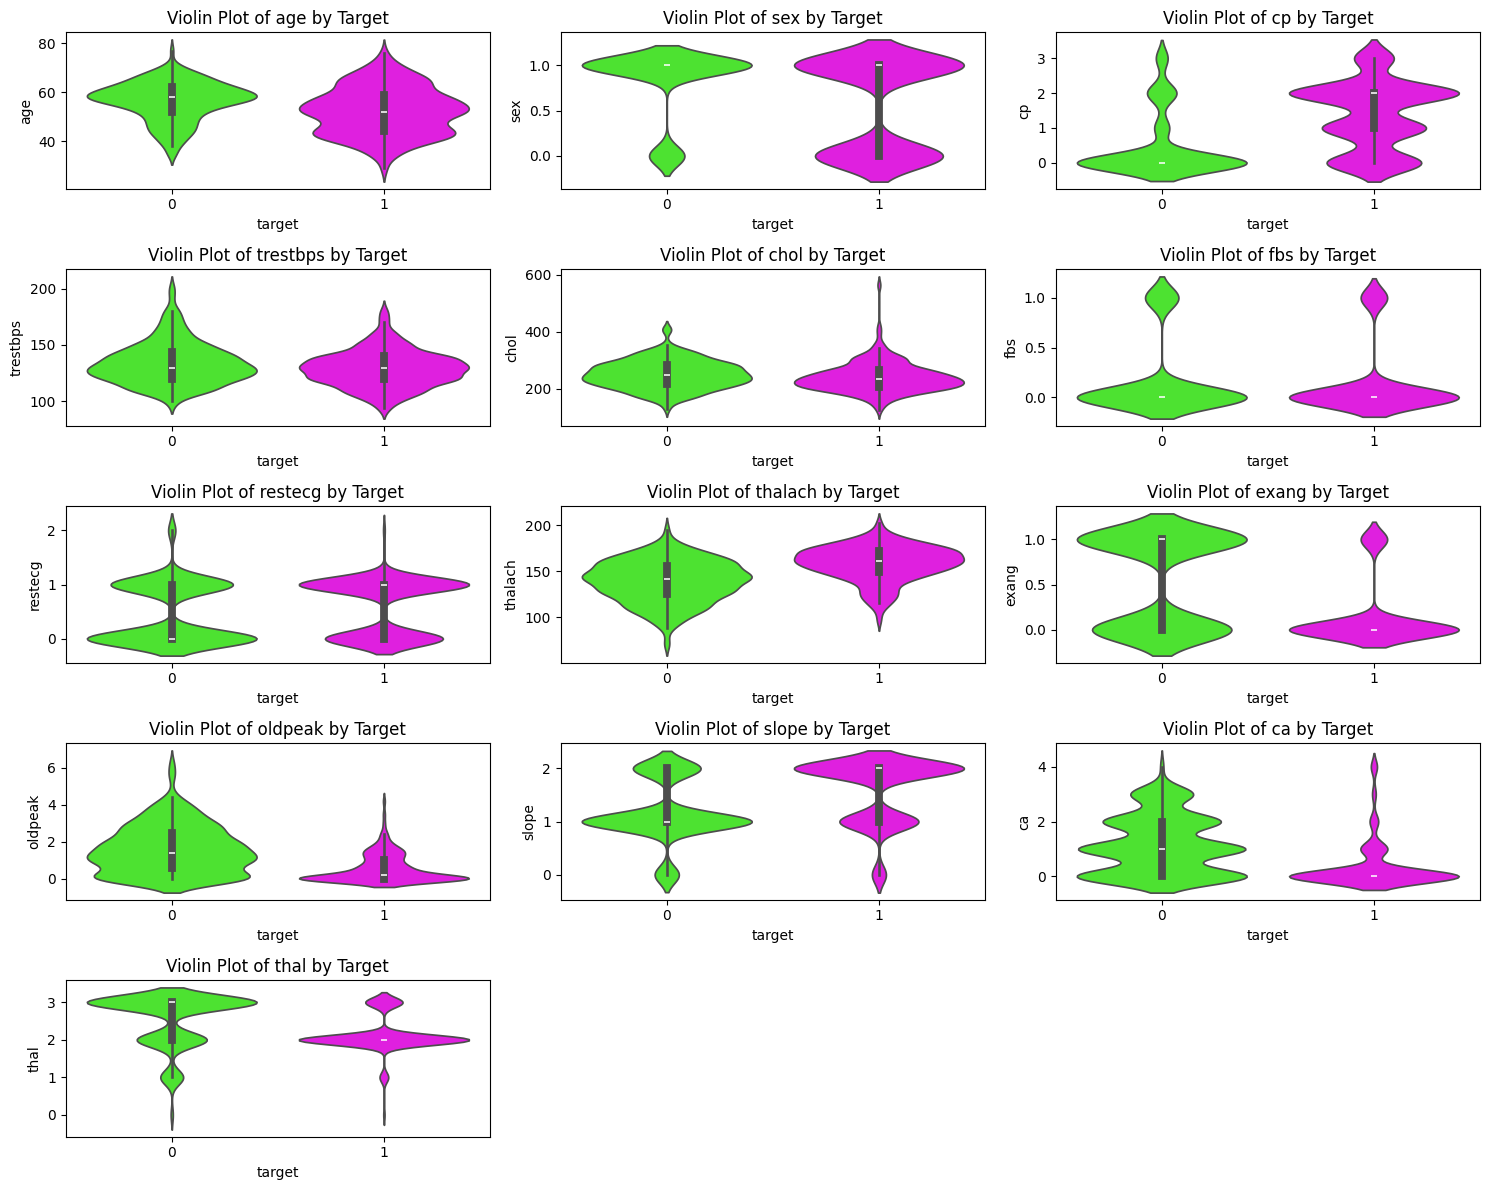

In [19]:
# Define a custom neon theme palette
neon_palette = ["#39FF14", "#FF00FF"]

# Set the custom neon theme palette
sns.set_palette(neon_palette)

# Create a grid for displaying violin plots
num_columns = len(data.columns) - 1  # Exclude the target column
num_rows = int(np.ceil(num_columns / 3))

plt.figure(figsize=(15, 12))

for i, column in enumerate(data.columns[:-1]):
    plt.subplot(num_rows, 3, i + 1)
    sns.violinplot(x="target", y=column, data=data, palette=neon_palette)
    plt.title(f"Violin Plot of {column} by Target")

# Adjust layout
plt.tight_layout()

# Show the grid of violin plots
# plt.savefig('eda1.png')
plt.show()

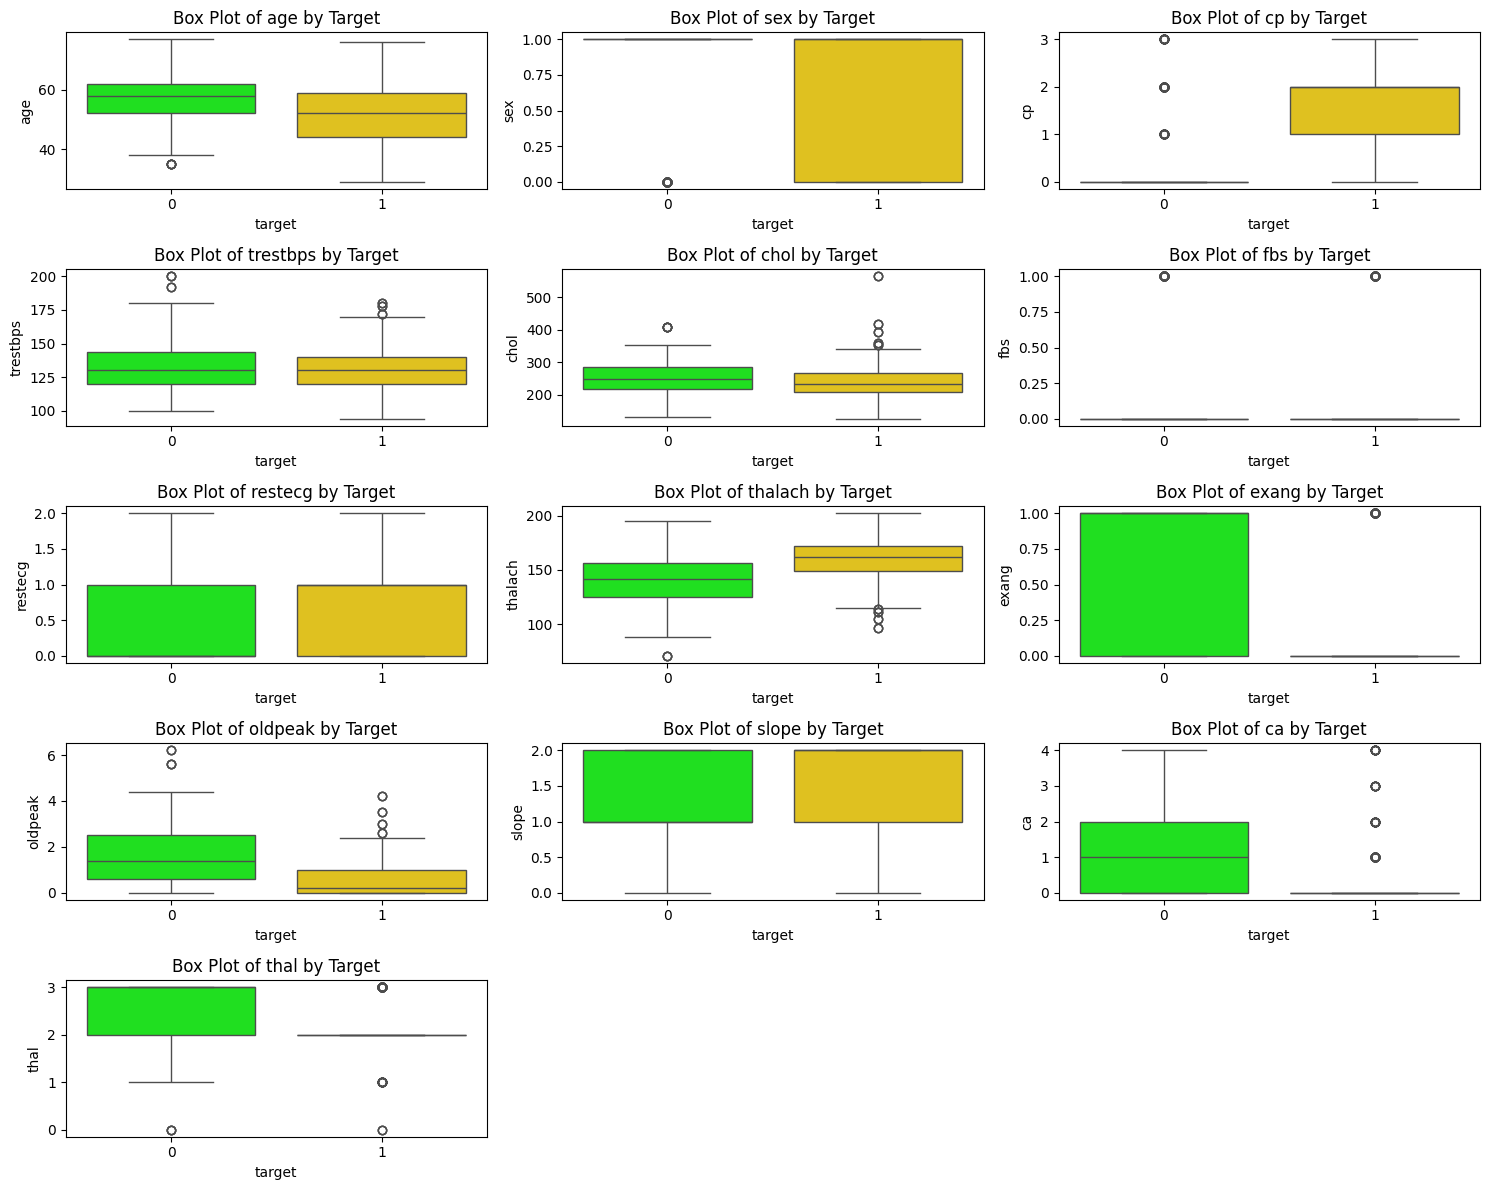

In [20]:
# Define another custom neon theme palette
neon_palette2 = ["#00FF00", "#FFD700"]

# Set the custom neon theme palette
sns.set_palette(neon_palette2)

# Create a grid for displaying box plots
num_columns = len(data.columns) - 1  # Exclude the target column
num_rows = int(np.ceil(num_columns / 3))

plt.figure(figsize=(15, 12))

for i, column in enumerate(data.columns[:-1]):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x="target", y=column, data=data, palette=neon_palette2)
    plt.title(f"Box Plot of {column} by Target")

# Adjust layout
plt.tight_layout()
# plt.savefig('eda2.png')

# Show the grid of box plots
plt.show()

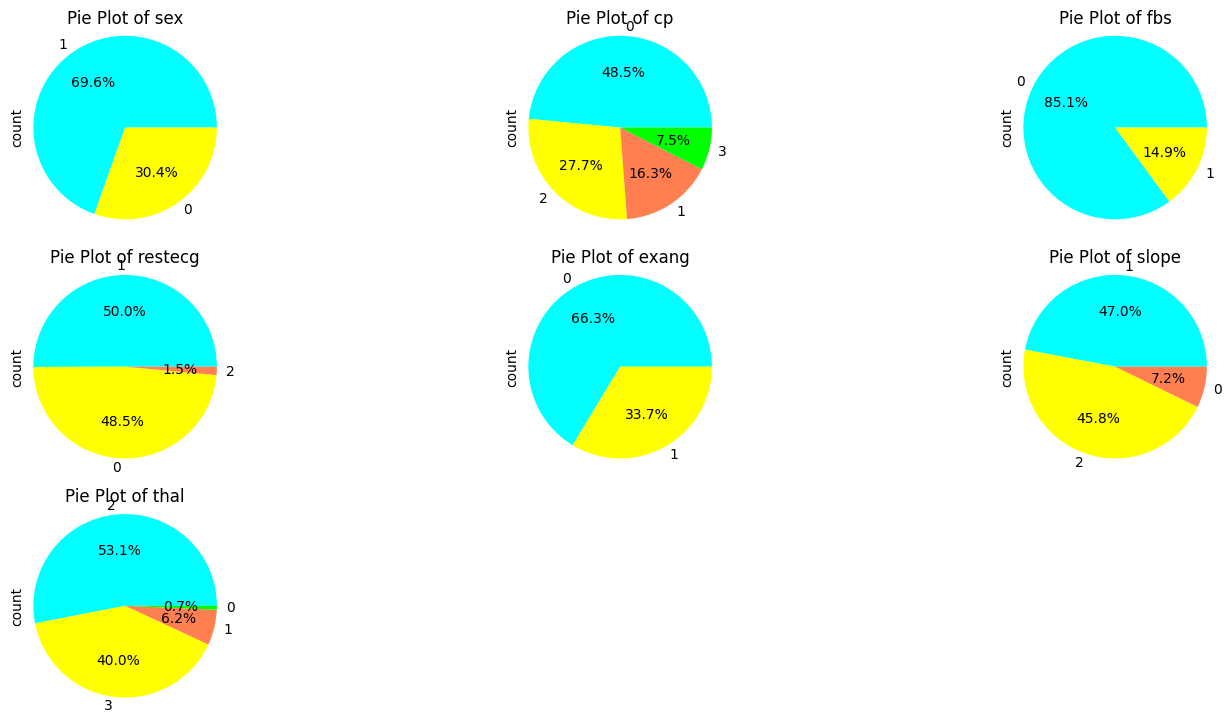

In [23]:
# Define a custom neon theme palette
neon_palette3 = ["#00FFFF", "#FFFF00", "#FF7F50", "#00FF00"]

# Set the custom neon theme palette
sns.set_palette(neon_palette3)

# Create a grid for displaying pie plots
num_columns = len(data.columns)

# Determine the number of rows and columns for the grid
num_rows = int(np.ceil(num_columns / 3))
num_cols = min(3, num_columns)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

plot_count = 0  # Track the number of valid plots

for i, column in enumerate(data.columns):
    if column != 'target':
        unique_values = len(data[column].unique())
        if unique_values <= 4:
            row_idx = plot_count // num_cols
            col_idx = plot_count % num_cols
            ax = axes[row_idx, col_idx]

            data[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, colors=neon_palette3, radius=1.2)
            ax.set_title(f"Pie Plot of {column}")
            plot_count += 1

# Remove any empty subplots
for i in range(plot_count, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show the grid of pie plots
plt.show()

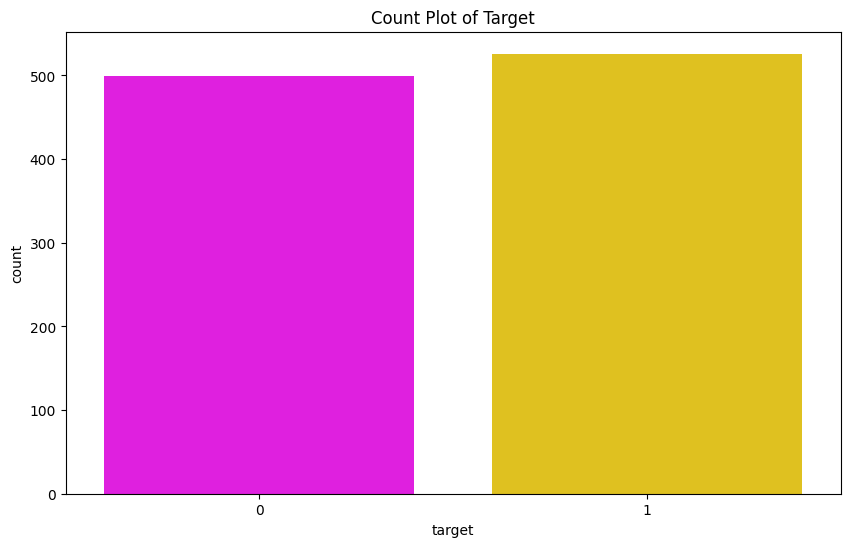

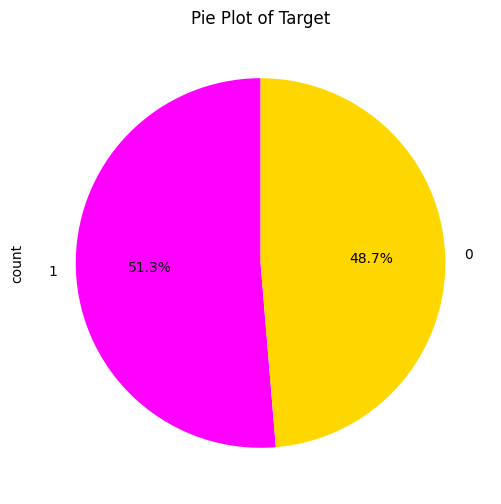

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom neon theme palette
neon_palette4 = ["#FF00FF", "#FFD700"]

# Set the custom neon theme palette
sns.set_palette(neon_palette4)

# Count Plot for the "target" column with different colors for each class
plt.figure(figsize=(10, 6))
sns.countplot(x="target", data=data, palette=neon_palette4)  # Specify the palette
# plt.savefig('eda3.png')
plt.title("Count Plot of Target")

# Show the count plot
plt.show()

# pie Plot for the "target" column with different colors for each class
plt.figure(figsize=(10, 6))
data['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=neon_palette4,startangle=90)
plt.title("Pie Plot of Target")
# plt.savefig('eda4.png')

# Show the pie plot
plt.show()

# 3. DATA PRE-PROCESSING

In [12]:
data = data.sample(frac=1)

x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print('[info] data segregation complete...')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print('[info] data splitting complete...')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print('[info] data pre-processing complete...')

[info] data segregation complete...
[info] data splitting complete...
[info] data pre-processing complete...


# 4. INDIVIDUAL MODEL TRAINING

### a. LOGISTIC REGRESSION

[info] logistic regression model training complete...

LOGISTIC REGRESSION : MODEL PARAMETERS

accuracy :  0.8896103896103896
precision :  0.930379746835443
recall :  0.8647058823529412
f1 score :  0.896341463414634

LOGISTIC REGRESSION : CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.85      0.92      0.88       138
           1       0.93      0.86      0.90       170

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308



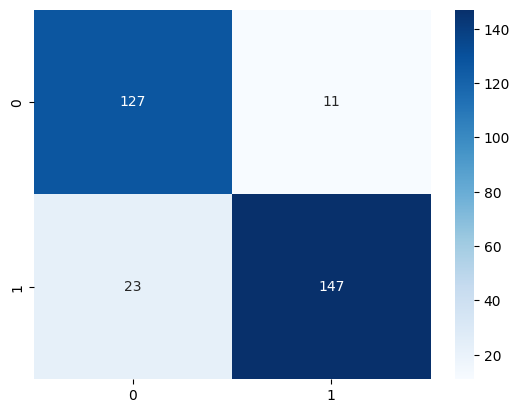

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
print('[info] logistic regression model training complete...')

y_predict_lr = lr.predict(x_test)
y_actual = y_test

#comparing actual answers vs model predictions to get the model parameters
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nLOGISTIC REGRESSION : MODEL PARAMETERS\n')
print('accuracy : ',accuracy_score(y_predict_lr,y_actual))
print('precision : ',precision_score(y_predict_lr,y_actual))
print('recall : ',recall_score(y_predict_lr,y_actual))
print('f1 score : ',f1_score(y_predict_lr,y_actual))

from sklearn.metrics import classification_report
print('\nLOGISTIC REGRESSION : CLASSIFICATION REPORT\n\n',classification_report(y_predict_lr,y_actual))

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_predict_lr,y_actual),cmap='Blues',annot=True,fmt='d')
# plt.savefig('1_logistic_regression_confusion_matrix.png')
plt.show()

# import joblib
# joblib.dump(lr,'logistic_regression.pkl')

### b. RANDOM FOREST

[info] random forest model training complete...

RANDOM FOREST : MODEL PARAMETERS

accuracy :  0.987012987012987
precision :  1.0
recall :  0.9753086419753086
f1 score :  0.9875

RANDOM FOREST : CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       146
           1       1.00      0.98      0.99       162

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



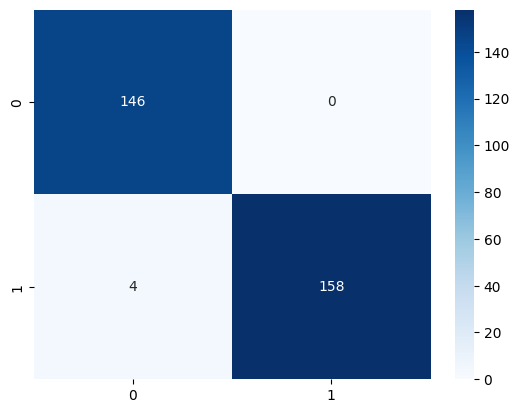

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion="entropy")
rf.fit(x_train_scaled,y_train)
print('[info] random forest model training complete...')

y_predict_rf = rf.predict(x_test)
y_actual = y_test

#comparing actual answers vs model predictions to get the model parameters
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nRANDOM FOREST : MODEL PARAMETERS\n')
print('accuracy : ',accuracy_score(y_predict_rf,y_actual))
print('precision : ',precision_score(y_predict_rf,y_actual))
print('recall : ',recall_score(y_predict_rf,y_actual))
print('f1 score : ',f1_score(y_predict_rf,y_actual))

from sklearn.metrics import classification_report
print('\nRANDOM FOREST : CLASSIFICATION REPORT\n\n',classification_report(y_predict_rf,y_actual))

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_predict_rf,y_actual),cmap='Blues',annot=True,fmt='d')
# plt.savefig('2_random_forest_confusion_matrix.png')
plt.show()

# import joblib
# joblib.dump(rf,'random_forest.pkl')

### c. DECISION TREE

[info] decision tree model training complete...

 DECISION TREE : MODEL PARAMETERS

accuracy :  0.987012987012987
precision :  0.9746835443037974
recall :  1.0
f1 score :  0.9871794871794872

DECISION TREE : CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       1.00      0.97      0.99       154
           1       0.97      1.00      0.99       154

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



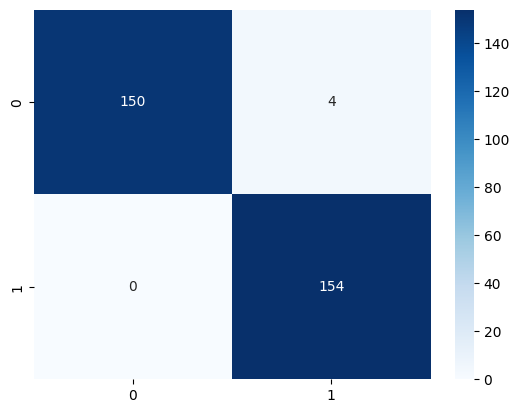

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train_scaled,y_train)
print('[info] decision tree model training complete...')

y_predict_dt = dt.predict(x_test)
y_actual = y_test

#comparing actual answers vs model predictions to get the model parameters
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\n DECISION TREE : MODEL PARAMETERS\n')
print('accuracy : ',accuracy_score(y_predict_dt,y_actual))
print('precision : ',precision_score(y_predict_dt,y_actual))
print('recall : ',recall_score(y_predict_dt,y_actual))
print('f1 score : ',f1_score(y_predict_dt,y_actual))

from sklearn.metrics import classification_report
print('\nDECISION TREE : CLASSIFICATION REPORT\n\n',classification_report(y_predict_dt,y_actual))

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_predict_dt,y_actual),cmap='Blues',annot=True,fmt='d')
# plt.savefig('3_decision_tree_confusion_matrix.png')
plt.show()

# import joblib
# joblib.dump(rf,'decision_tree.pkl')

# 5. HYBRID MODEL TRAINING

In [16]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()

# # Define the meta-model (XGBoost)
# from xgboost import XGBClassifier
# meta_model = XGBClassifier()

# # Create the StackingClassifier
# from sklearn.ensemble import StackingClassifier
# stacked_model = StackingClassifier(
#     estimators=[
#         ('lr', lr),
#         ('rf', rf),
#         ('dt', dt)
#     ],
#     final_estimator=meta_model,
#     cv=5  # You can adjust the number of cross-validation folds as needed
# )

# # Train the stacked model
# stacked_model = stacked_model.fit(x_train_scaled, y_train)
# print('[info] hybrid model training complete...')

# # import joblib
# # joblib.dump(stacked_model,'stacked_model_new.pkl')#for predicting output
# # joblib.dump(scaler,'scaler.pkl')#for scaling the user input

# 6. HYBRID MODEL EVALUATION


STACKED MODEL : MODEL PARAMETERS

accuracy :  0.9967532467532467
precision :  0.9936708860759493
recall :  1.0
f1 score :  0.9968253968253968

STACKED MODEL CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       157

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



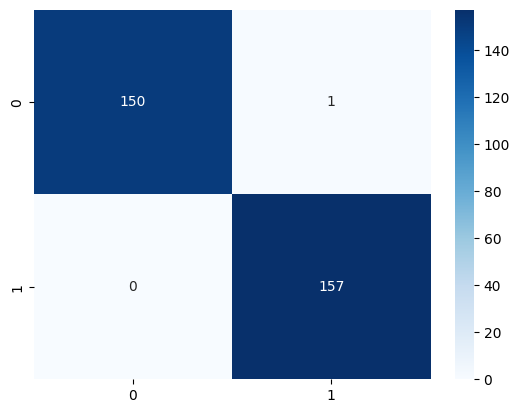

In [17]:
import joblib
stacked_model = joblib.load('stacked_model.pkl')

y_predict = stacked_model.predict(x_test)
y_actual = y_test

#comparing actual answers vs model predictions to get the model parameters
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nSTACKED MODEL : MODEL PARAMETERS\n')
print('accuracy : ',accuracy_score(y_predict,y_actual))
print('precision : ',precision_score(y_predict,y_actual))
print('recall : ',recall_score(y_predict,y_actual))
print('f1 score : ',f1_score(y_predict,y_actual))

from sklearn.metrics import classification_report
print('\nSTACKED MODEL CLASSIFICATION REPORT\n\n',classification_report(y_predict,y_actual))

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_predict,y_actual),cmap='Blues',annot=True,fmt='d')
plt.savefig('4_stacked_model_confusion_matrix.png')
plt.show()

# 7. MODEL IMPLEMENTATION

In [18]:
import joblib
model = joblib.load('stacked_model.pkl')

# Prompt the user for input for specific features
age = int(input('Enter age: '))
sex = int(input('Enter sex (0 for female, 1 for male): '))
chest_pain_type = int(input('Enter chest pain type: '))
resting_blood_pressure = int(input('Enter resting blood pressure: '))
cholesterol = int(input('Enter cholesterol level: '))
fasting_blood_sugar = int(input('Enter fasting blood sugar (0 for false, 1 for true): '))
resting_ecg = int(input('Enter resting ECG: '))
max_heart_rate = int(input('Enter maximum heart rate: '))
exercise_induced_angina = int(input('Enter exercise-induced angina (0 for no, 1 for yes): '))
st_depression = float(input('Enter ST depression: '))
slope = int(input('Enter slope: '))
major_vessels_number = int(input('Enter number of major vessels: '))
thal = int(input('Enter Thal: '))

new_user_input = [[age, sex, chest_pain_type,
                   resting_blood_pressure, cholesterol,
                   fasting_blood_sugar, resting_ecg, max_heart_rate,
                   exercise_induced_angina, st_depression, slope,
                   major_vessels_number, thal]]

# scaler = StandardScaler()

new_user_input_scaled = scaler.transform(new_user_input)

print("\nmodel diagnosis : ",model.predict(new_user_input_scaled)[0])

Enter age:  5.6


ValueError: invalid literal for int() with base 10: '5.6'